### รูปตัวอย่างแสดงโมเดลที่ Overfit และ Underfit กับข้อมูล

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings

In [6]:
# ข้อมูลทดสอบ
x = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])

In [7]:
# Polynomial Models at different degrees
p3 = np.poly1d(np.polyfit(x, y, 3))
p2 = np.poly1d(np.polyfit(x, y, 2))
p1 = np.poly1d(np.polyfit(x, y, 1))
p0 = np.poly1d(np.polyfit(x, y, 0))

with warnings.catch_warnings():
    warnings.simplefilter('ignore', np.RankWarning)
    p30 = np.poly1d(np.polyfit(x, y, 30))

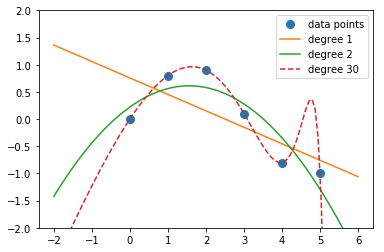

In [9]:
# พล็อตกราฟสำหรับเปรียบเทียบ underfit, overfit
xp = np.linspace(-2, 6, 100)
_ = plt.plot(x, y, '.',
             xp, p1(xp), '-',
             xp, p2(xp),  '-', 
             xp, p30(xp), '--', 
             markersize=16)
plt.ylim(-2, 2)
plt.legend(labels=['data points', 'degree 1', 'degree 2', 'degree 30'])
plt.savefig('overfit-underfit.png')

### การแบ่งชุดข้อมูลออกเป็น training และ testing

เราสามารถตรวจสอบและป้องกัน overfit ได้โดยการแบ่งชุดข้อมูลออกเป็น training และ testing ดังตัวอย่างโปรแกรมต่อไปนี้

In [20]:
import random
from typing import TypeVar, List, Tuple

X = TypeVar('X') 
Y = TypeVar('Y')

def split_data(data: List[X], prob: float) -> Tuple[List[X], List[X]]:
    """Split data into fractions [prob, 1-prob]"""
    data = data[:]
    random.shuffle(data)
    cut = int(len(data) * prob)
    return data[:cut], data[cut:]

def train_test_split(xs: List[X],                     
                     ys: List[Y],                     
                     test_pct: float) -> Tuple[List[X], List[X], 
                                               List[Y], List[Y]]:
    idxs = [i for i in range(len(xs))]
    train_idxs, test_idxs = split_data(idxs, 1-test_pct)
    
    return ([xs[i] for i in train_idxs],
            [xs[i] for i in test_idxs],
            [ys[i] for i in train_idxs],
            [ys[i] for i in test_idxs])

xs = [x for x in range(1000)]
ys = [2 * x for x in xs]
x_train, x_test, y_train, y_test = train_test_split(xs, ys, 0.25)

assert len(x_train) == len(y_train) == 750
assert len(x_test) == len(y_test) == 250
assert all(y == 2 * x for x, y in zip(x_train, y_train))
assert all(y == 2 * x for x, y in zip(x_test, y_test))

### การประเมินประสิทธิภาพของโมเดล (ความถูกต้อง)
ทำได้โดยการคำนวณค่า accuracy, precision, recall, f1 score

In [25]:
def accuracy(true_positive: int, false_positive: int,
             false_negative: int, true_negative: int) -> float:
    correct = true_positive + true_negative
    total = true_positive + false_positive + false_negative + true_negative
    return correct / total

assert accuracy(85, 20, 15, 880) == (85+880) / 1000

In [26]:
def precision(true_positive: int, false_positive: int,
             false_negative: int, true_negative: int) -> float:
    return true_positive / (true_positive + false_positive)

assert precision(85, 20, 15, 880) == 85/(85+20)

In [27]:
def recall(true_positive: int, false_positive: int,
             false_negative: int, true_negative: int) -> float:
    return true_positive / (true_positive + false_negative)

assert recall(85, 20, 15, 880) == 85 / (85 + 15)

In [24]:
def f1_score(true_positive: int, false_positive: int,
             false_negative: int, true_negative: int) -> float:
    P = precision(true_positive, false_positive, false_negative, true_negative)
    R = recall(true_positive, false_positive, false_negative, true_negative)
    
    return 2 * P * R / (P + R)